<a href="https://colab.research.google.com/github/HazCodesLots/AudioForgeryDetection/blob/main/ESRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install dependencies
!pip install torch torchvision basicsr facexlib gfpgan

# Step 2: Clone and setup Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN
%cd Real-ESRGAN
!python setup.py develop

# Step 3: Patch the broken import for torchvision >= 0.13
!sed -i 's/functional_tensor/functional/g' /usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py

# Step 4: Download pretrained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P weights

fatal: destination path 'Real-ESRGAN' already exists and is not an empty directory.
/content/Real-ESRGAN
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        sta

In [2]:
import os
import cv2
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

# Clean previous folders
for folder in [upload_folder, result_folder]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# Upload video file (e.g. .mp4)
uploaded = files.upload()

# Move uploaded video to upload/
for filename in uploaded.keys():
    dst_path = os.path.join(upload_folder, filename)
    print(f'Moving {filename} to {dst_path}')
    shutil.move(filename, dst_path)

# Extract frames from video
video_files = [f for f in os.listdir(upload_folder) if f.lower().endswith((".mp4", ".mov", ".avi", ".mkv"))]
if not video_files:
    raise ValueError(" No video file found in upload/. Please upload a .mp4 or similar.")

video_path = os.path.join(upload_folder, video_files[0])
print(f"\n🎞️ Extracting frames from: {video_path}")

cap = cv2.VideoCapture(video_path)
frame_idx = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_path = os.path.join(upload_folder, f"frame_{frame_idx:05d}.png")
    cv2.imwrite(frame_path, frame)
    frame_idx += 1
cap.release()

print(f" Extracted {frame_idx} frames to '{upload_folder}'")


Saving avatar_1.mp4 to avatar_1.mp4
Moving avatar_1.mp4 to upload/avatar_1.mp4

🎞️ Extracting frames from: upload/avatar_1.mp4
 Extracted 524 frames to 'upload'


In [3]:
import os

# Remove non-image files from upload/
for f in os.listdir("upload"):
    if not f.lower().endswith((".png", ".jpg", ".jpeg", ".webp", ".bmp")):
        print(f"Deleting non-image file: {f}")
        os.remove(os.path.join("upload", f))


Deleting non-image file: avatar_1.mp4


In [4]:
import time

start = time.time()

!python inference_realesrgan.py \
    -n RealESRGAN_x4plus \
    -i upload \
    --outscale 2.0 \
    --tile 1200

end = time.time()
print(f"\n Done in {(end - start)/60:.2f} minutes")


Testing 0 frame_00000
	Tile 1/1
Testing 1 frame_00001
	Tile 1/1
Testing 2 frame_00002
	Tile 1/1
Testing 3 frame_00003
	Tile 1/1
Testing 4 frame_00004
	Tile 1/1
Testing 5 frame_00005
	Tile 1/1
Testing 6 frame_00006
	Tile 1/1
Testing 7 frame_00007
	Tile 1/1
Testing 8 frame_00008
	Tile 1/1
Testing 9 frame_00009
	Tile 1/1
Testing 10 frame_00010
	Tile 1/1
Testing 11 frame_00011
	Tile 1/1
Testing 12 frame_00012
	Tile 1/1
Testing 13 frame_00013
	Tile 1/1
Testing 14 frame_00014
	Tile 1/1
Testing 15 frame_00015
	Tile 1/1
Testing 16 frame_00016
	Tile 1/1
Testing 17 frame_00017
	Tile 1/1
Testing 18 frame_00018
	Tile 1/1
Testing 19 frame_00019
	Tile 1/1
Testing 20 frame_00020
	Tile 1/1
Testing 21 frame_00021
	Tile 1/1
Testing 22 frame_00022
	Tile 1/1
Testing 23 frame_00023
	Tile 1/1
Testing 24 frame_00024
	Tile 1/1
Testing 25 frame_00025
	Tile 1/1
Testing 26 frame_00026
	Tile 1/1
Testing 27 frame_00027
	Tile 1/1
Testing 28 frame_00028
	Tile 1/1
Testing 29 frame_00029
	Tile 1/1
Testing 30 frame_000

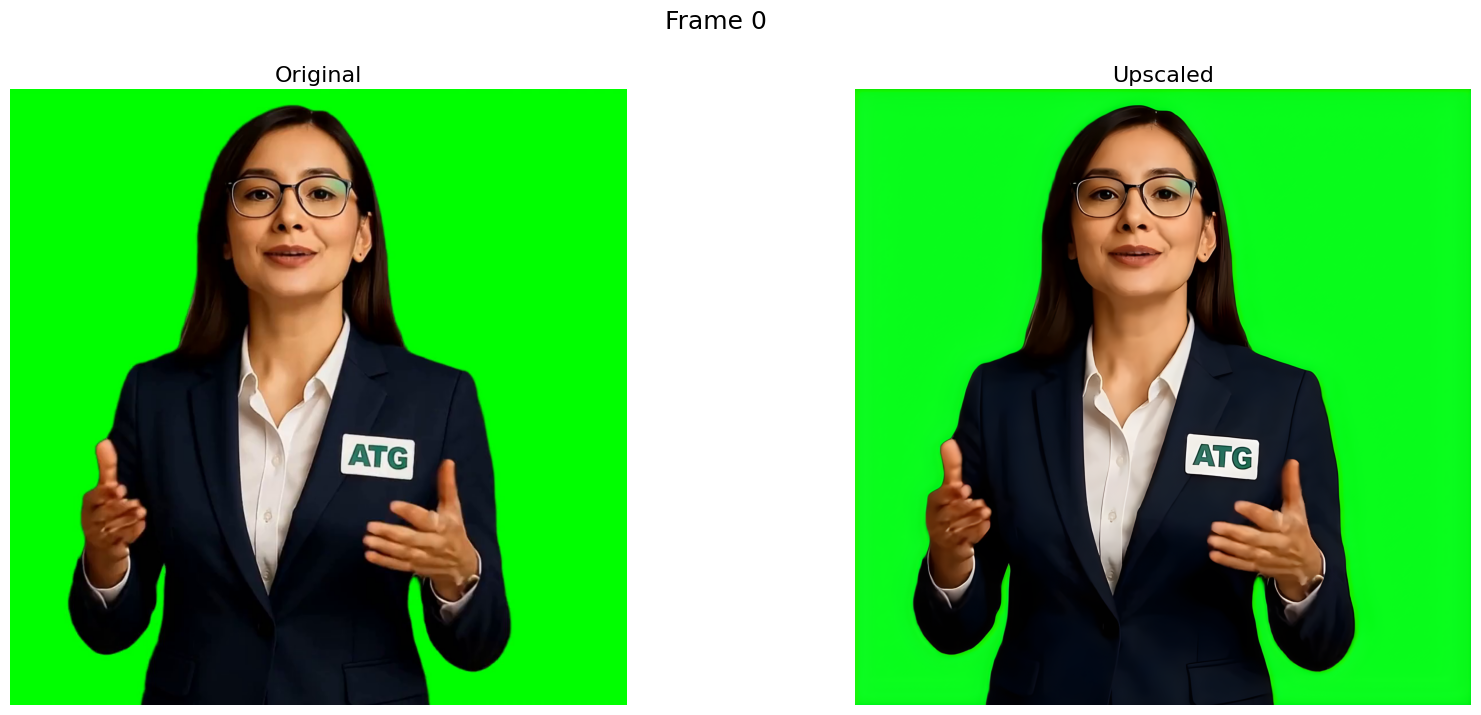

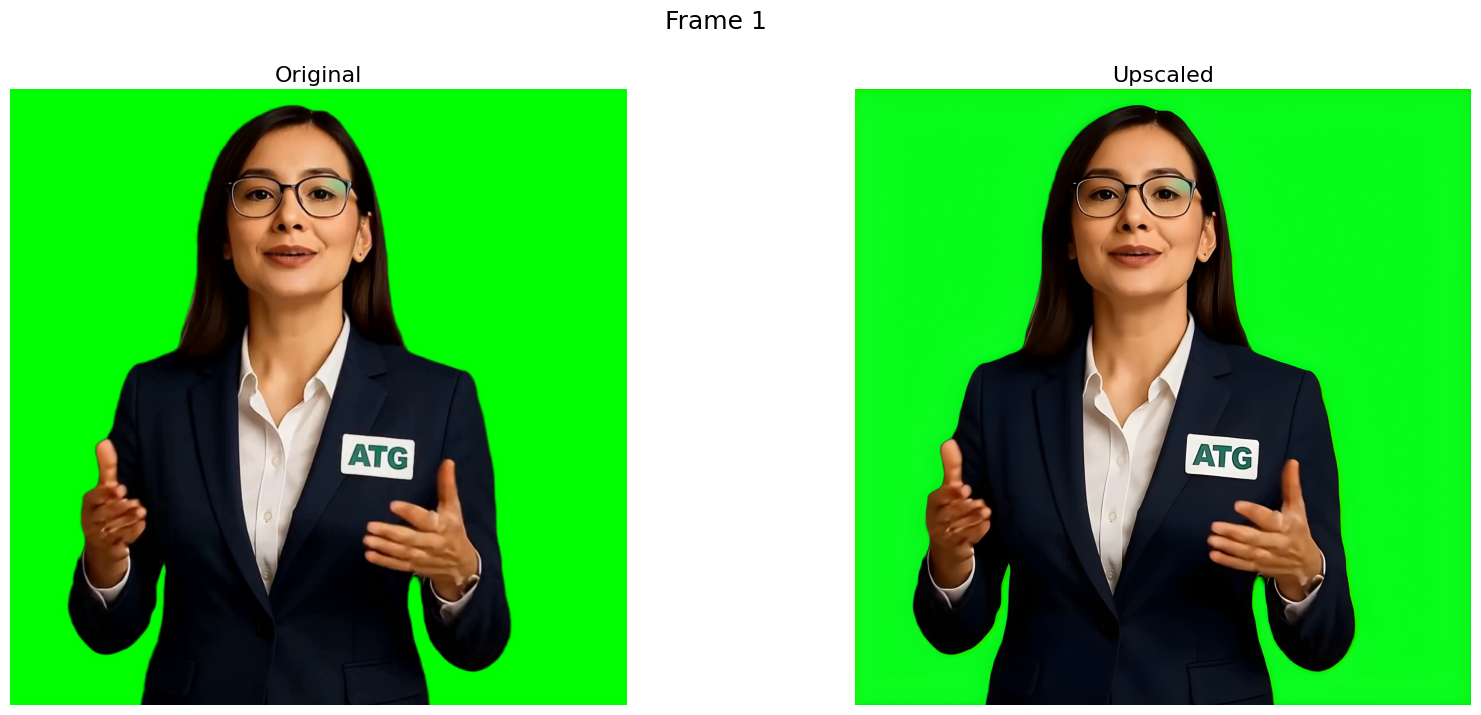

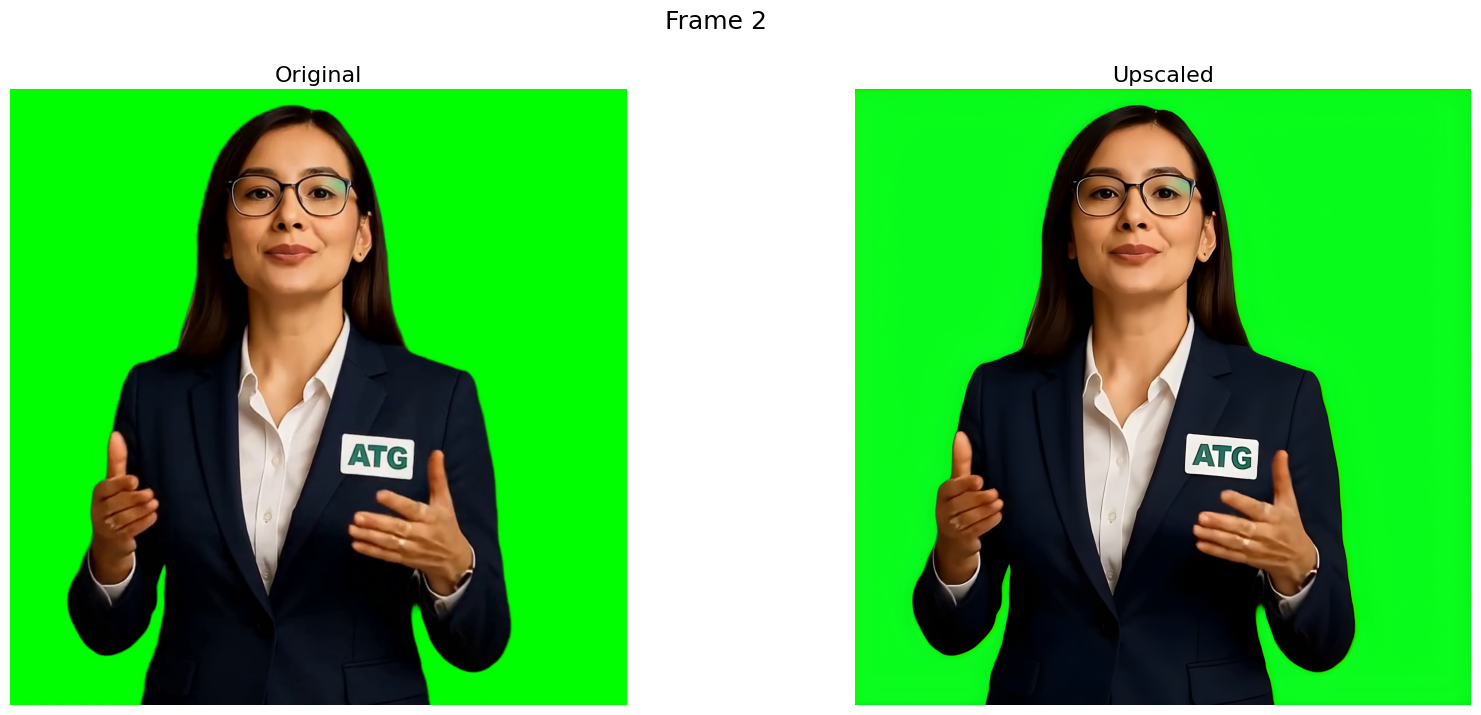

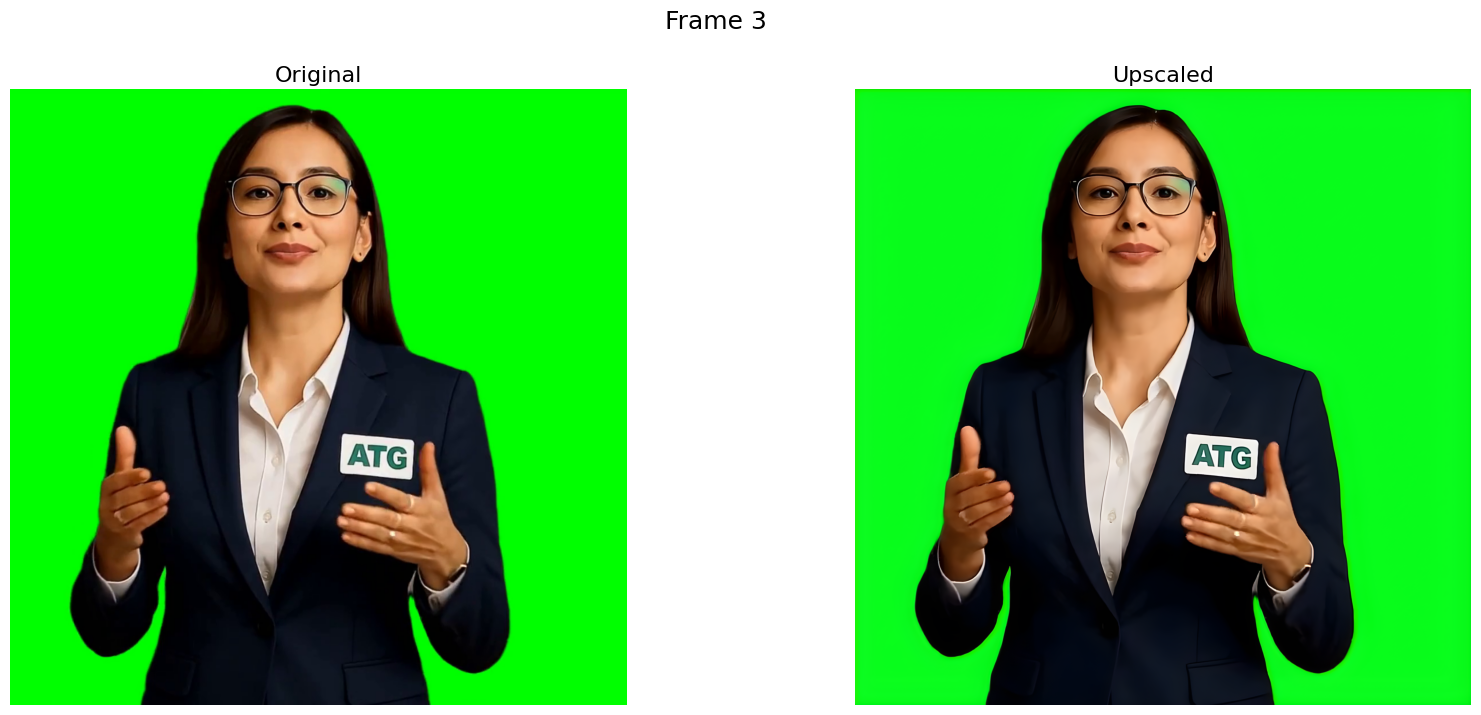

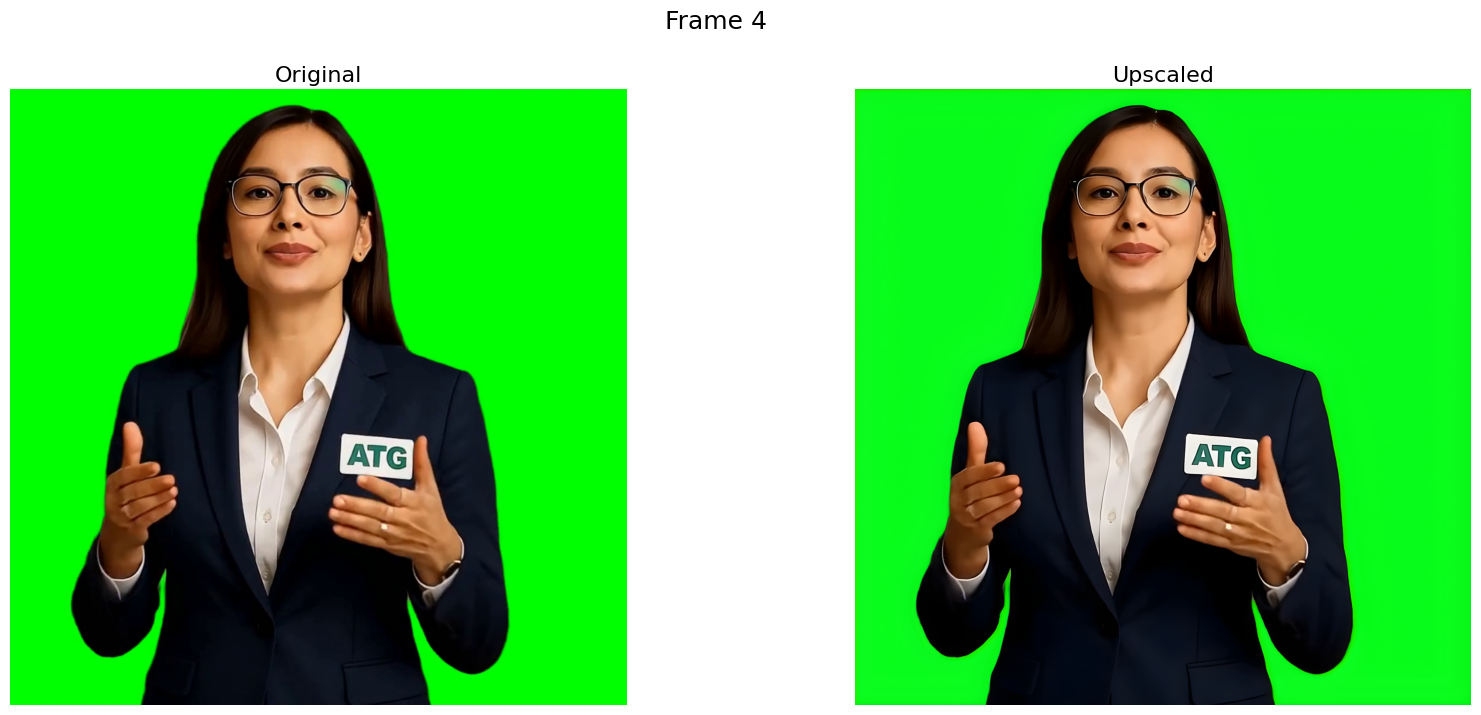

In [5]:
# === VISUAL COMPARISON FOR A FEW FRAMES ===
import os
import glob
import cv2
import matplotlib.pyplot as plt

def display(img1, img2, title):
    fig = plt.figure(figsize=(20, 8))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.imshow(img1)
    ax1.set_title("Original", fontsize=16)
    ax2.imshow(img2)
    ax2.set_title("Upscaled", fontsize=16)
    ax1.axis("off")
    ax2.axis("off")
    plt.suptitle(title, fontsize=18)
    plt.show()

def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_folder = 'upload'
result_folder = 'results'

# Filter only image files and sort
input_list = sorted([f for f in glob.glob(os.path.join(input_folder, '*.png'))])
output_list = sorted([f for f in glob.glob(os.path.join(result_folder, '*.png'))])

# Show only the first N frame pairs
N = 5  # you can increase if needed
for i, (input_path, output_path) in enumerate(zip(input_list, output_list)):
    if i >= N:
        break
    display(imread(input_path), imread(output_path), title=f'Frame {i}')


In [6]:
import cv2
import os
import glob
from moviepy.editor import VideoFileClip, AudioFileClip

results_dir = 'results'
output_video_path = 'upscaled_video.mp4'
original_video_path = next((f for f in os.listdir('upload') if f.endswith('.mp4')), None)

# 🖼️ Get all upscaled frames
frame_paths = sorted(glob.glob(os.path.join(results_dir, '*.png')))
if not frame_paths:
    raise RuntimeError(" No upscaled frames found in 'results/'.")

# 🧠 Read first frame to get size
frame_example = cv2.imread(frame_paths[0])
height, width, _ = frame_example.shape

# 🎞️ Write video
fps = 25  # You can change this based on your source video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print(f"🎬 Writing {len(frame_paths)} frames to video...")
for path in frame_paths:
    frame = cv2.imread(path)
    video_writer.write(frame)

video_writer.release()
print(f" Saved video: {output_video_path}")

# 🔊 Optional: add original audio
if original_video_path:
    print(" Adding audio from original video...")
    original_clip = VideoFileClip(os.path.join('upload', original_video_path))
    upscaled_clip = VideoFileClip(output_video_path).set_audio(original_clip.audio)
    upscaled_clip.write_videofile("upscaled_video_with_audio.mp4", codec="libx264", audio_codec="aac")
    final_output = "upscaled_video_with_audio.mp4"
else:
    print(" No original .mp4 found in upload/ — skipping audio")
    final_output = output_video_path


🎬 Writing 524 frames to video...
 Saved video: upscaled_video.mp4
 No original .mp4 found in upload/ — skipping audio


In [7]:
import os

print("upload/ contains:")
print(os.listdir('upload'))


upload/ contains:
['frame_00276.png', 'frame_00053.png', 'frame_00386.png', 'frame_00107.png', 'frame_00436.png', 'frame_00460.png', 'frame_00421.png', 'frame_00238.png', 'frame_00228.png', 'frame_00509.png', 'frame_00029.png', 'frame_00215.png', 'frame_00469.png', 'frame_00083.png', 'frame_00446.png', 'frame_00367.png', 'frame_00154.png', 'frame_00329.png', 'frame_00092.png', 'frame_00298.png', 'frame_00067.png', 'frame_00117.png', 'frame_00014.png', 'frame_00517.png', 'frame_00321.png', 'frame_00244.png', 'frame_00172.png', 'frame_00069.png', 'frame_00060.png', 'frame_00237.png', 'frame_00151.png', 'frame_00143.png', 'frame_00072.png', 'frame_00119.png', 'frame_00498.png', 'frame_00273.png', 'frame_00416.png', 'frame_00282.png', 'frame_00229.png', 'frame_00079.png', 'frame_00463.png', 'frame_00037.png', 'frame_00163.png', 'frame_00233.png', 'frame_00167.png', 'frame_00445.png', 'frame_00038.png', 'frame_00481.png', 'frame_00284.png', 'frame_00521.png', 'frame_00187.png', 'frame_00355